In [1]:
# Load libraries
import pandas as pd
import numpy as np
#stuff from pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
#stuff for spliting and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay# to get a display
from sklearn import metrics #Import scikit-learn metrics for evaluation metrics
#for plotting
import matplotlib.pyplot as plt

In [2]:
col_names = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
'bmi', 'diabetes_pedigree_function', 'age', 'outcome']
# load dataset
data = pd.read_csv("diabetes.csv", header=None, names=col_names)
#take a peek to see if this looks right
data.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#split dataset in features and target variable
feature_cols = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
'bmi', 'diabetes_pedigree_function', 'age']
X = data[feature_cols] # Features
y = data.outcome # Target variable - notice - you need to spell the column name for the target correctly for this to work

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 70% training and 30% test

In [5]:
# Creating Tensors
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [2]:
# Get cpu, gpu or mps device for training.
device = (
"cuda"
if torch.cuda.is_available()
else "mps"
if torch.backends.mps.is_available()
else "cpu"
)

In [3]:
#Create Model
class ANN_model(nn.Module):
    def __init__(self,input_dim=8,hidden1_dim=20, hidden2_dim=10,out_dim=2):
        '''
        input_dim is 8 because there are 8 columns of features in this set.
        we are setting up 2 hidden layers the first has 20 nodes, the second has 10
        out_dim is 2 because there are two options - diabetic or non-diabetic
        '''
        super().__init__()
        #connent input to first hidden layer
        self.layer1 = nn.Linear(input_dim,hidden1_dim)
        #connect first hidden layer to the second hidden layer
        self.layer2 = nn.Linear(hidden1_dim,hidden2_dim)
        #connect second hidden layer to output
        self.out = nn.Linear(hidden2_dim,out_dim)
        #Note: each layer has a weight and bias that in embedded in the linear layer

    def forward(self,x):
        #compute the output of f_connected1 and apply ReLu
        x = F.relu(self.layer1(x))
        #compute the output of f_connected2 and apply ReLu
        x = F.relu(self.layer2(x))
        #compute the output layer
        # no activation: cross entropy will compute softmax
        x = self.out(x)
        return x

In [8]:
#seed pytorch - for reproducibility of setting initial weights
torch.manual_seed(20)
#set up model using the class you made
model = ANN_model().to(device)

In [9]:
#print out the model
print(model)

ANN_model(
  (layer1): Linear(in_features=8, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [10]:
# Backward Propagation - loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

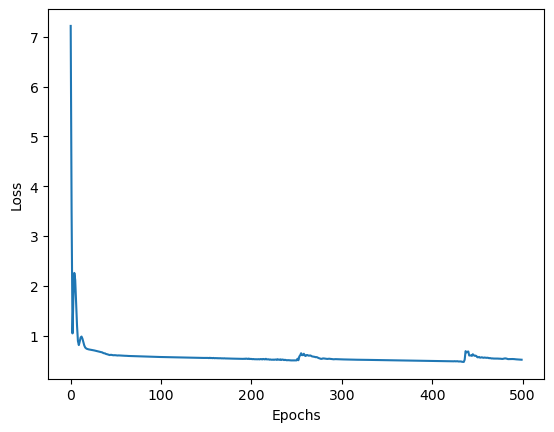

In [12]:
#look at the loss
#plot the loss function
plt.plot(range(epochs),final_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [13]:
#make a list of the results
predictions = []
#turn off gradient computation to speed up testing
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

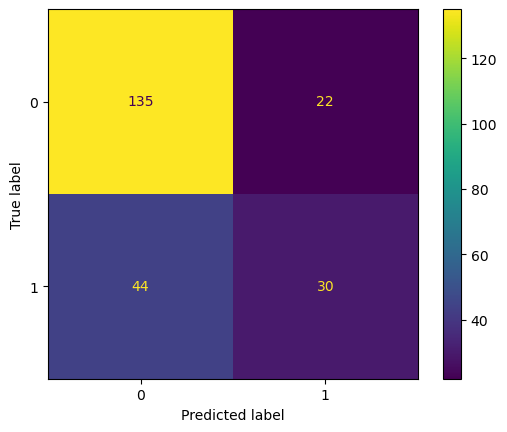

In [14]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [15]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       157
           1       0.58      0.41      0.48        74

    accuracy                           0.71       231
   macro avg       0.67      0.63      0.64       231
weighted avg       0.70      0.71      0.70       231



In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7142857142857143


In [17]:
#try a smaller learning rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [18]:
#set up number of epochs
epochs = 500
#create a list to for plotting - not required - but so you can see the change
final_losses= []
for i in range(epochs):
    #run forward pass
    y_pred=model.forward(X_train)
    #calculate the loss
    loss=loss_function(y_pred,y_train)
    #append for graphing
    final_losses.append(loss.item())
    #don't print all 500 - but some of them
    if i % 10 == 0:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    #Resets or zeros out the previous gradients
    optimizer.zero_grad()
    #computes gradient (dloss/dx) for every parameter x
    loss.backward()
    #update the weights using step
    optimizer.step()

Epoch number: 0 and the loss : 0.516345739364624
Epoch number: 10 and the loss : 0.5122664570808411
Epoch number: 20 and the loss : 0.5090885758399963
Epoch number: 30 and the loss : 0.5059723854064941
Epoch number: 40 and the loss : 0.5026591420173645
Epoch number: 50 and the loss : 0.49972251057624817
Epoch number: 60 and the loss : 0.49683088064193726
Epoch number: 70 and the loss : 0.49399444460868835
Epoch number: 80 and the loss : 0.4913228452205658
Epoch number: 90 and the loss : 0.48845425248146057
Epoch number: 100 and the loss : 0.48502615094184875
Epoch number: 110 and the loss : 0.4812738001346588
Epoch number: 120 and the loss : 0.47767555713653564
Epoch number: 130 and the loss : 0.4745798110961914
Epoch number: 140 and the loss : 0.4718814790248871
Epoch number: 150 and the loss : 0.4689609706401825
Epoch number: 160 and the loss : 0.4656243324279785
Epoch number: 170 and the loss : 0.4626810550689697
Epoch number: 180 and the loss : 0.45991700887680054
Epoch number: 190

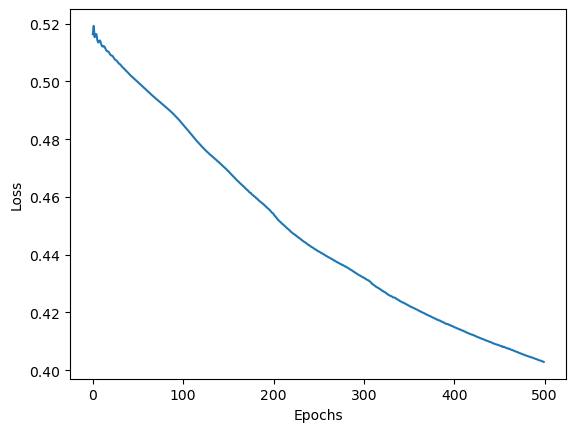

In [19]:
#look at the loss
#plot the loss function
plt.plot(range(epochs),final_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Question Page 8
<p>Yes, the plots are very different than one another. The one with a larger learning rate has a much steeper drop and converges much sooner but to a larger value; however, the one with a smaller learning rate takes longer to converge, but has a much smaller loss rate overall. </p>

In [20]:
predictions = []
#turn off gradient computation to speed up testing
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

In [21]:
print(metrics.classification_report(y_test,predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       157
           1       0.57      0.51      0.54        74

    accuracy                           0.72       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231

Accuracy: 0.7186147186147186


In [22]:
#try a smaller learning rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

#Then rerun your training and then testing to see if you get results that are
#different.
#set up number of epochs
epochs = 1000
#create a list to for plotting - not required - but so you can see the change
final_losses= []
for i in range(epochs):
    #run forward pass
    y_pred=model.forward(X_train)
    #calculate the loss
    loss=loss_function(y_pred,y_train)
    #append for graphing
    final_losses.append(loss.item())
    #don't print all 500 - but some of them
    if i % 10 == 0:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    #Resets or zeros out the previous gradients
    optimizer.zero_grad()
    #computes gradient (dloss/dx) for every parameter x
    loss.backward()
    #update the weights using step
    optimizer.step()

Epoch number: 0 and the loss : 0.40273311734199524
Epoch number: 10 and the loss : 0.40408074855804443
Epoch number: 20 and the loss : 0.4017937183380127
Epoch number: 30 and the loss : 0.4009988605976105
Epoch number: 40 and the loss : 0.40025824308395386
Epoch number: 50 and the loss : 0.3995210528373718
Epoch number: 60 and the loss : 0.39889031648635864
Epoch number: 70 and the loss : 0.3980935215950012
Epoch number: 80 and the loss : 0.3973228931427002
Epoch number: 90 and the loss : 0.39657828211784363
Epoch number: 100 and the loss : 0.39585795998573303
Epoch number: 110 and the loss : 0.3950287401676178
Epoch number: 120 and the loss : 0.39417165517807007
Epoch number: 130 and the loss : 0.3930547833442688
Epoch number: 140 and the loss : 0.3917812705039978
Epoch number: 150 and the loss : 0.3903614580631256
Epoch number: 160 and the loss : 0.38892534375190735
Epoch number: 170 and the loss : 0.38763725757598877
Epoch number: 180 and the loss : 0.38643237948417664
Epoch number:

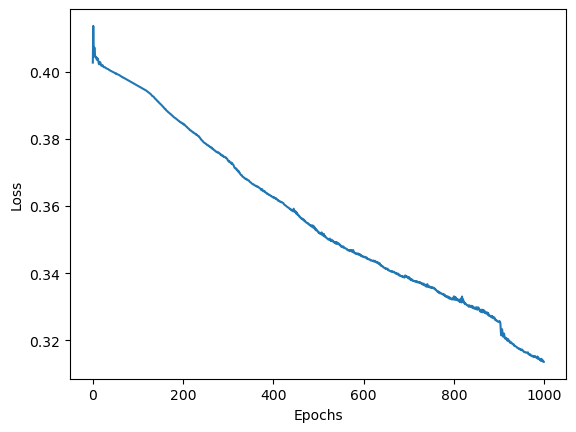

In [23]:
#look at the loss
#plot the loss function
plt.plot(range(epochs),final_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [24]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [25]:
model = ANN_model().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

# Personal Data Section
##### Using Semsmic dataset

In [23]:
col_names = ['method', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy', 'gdpuls', 
             'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'energy',
             'maxenergy', 'class']
feature_cols = ['method', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy', 'gdpuls', 
             'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'energy',
             'maxenergy']

# load dataset
data = pd.read_csv("seismic-bumps.csv", header=None, names=col_names)
#take a peek to see if this looks right
data.head()

,method,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,0,0,0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0
1,0,0,0,14720,33,-70,-79,0,1,0,1,0,0,2000,2000,0
2,0,0,0,8050,30,-81,-78,0,0,0,0,0,0,0,0,0
3,0,0,0,28820,171,-23,40,0,1,0,1,0,0,3000,3000,0
4,0,0,0,12640,57,-63,-52,0,0,0,0,0,0,0,0,0


In [24]:
data.describe()

,method,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
count,2584.000000,2584.000000,2584.000000,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,0.349071,0.407121,0.643576,9.024252e+04,538.579334,12.375774,4.508901,0.105263,0.859520,0.393576,0.392802,0.067724,0.004644,4975.270898,4278.850619,0.065789
std,0.476769,0.527857,0.479035,2.292005e+05,562.652536,80.319051,63.166556,0.342707,1.364616,0.783772,0.769710,0.279059,0.068001,20450.833222,19357.454882,0.247962
min,0.000000,0.000000,0.000000,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,5.283250e+04,669.000000,38.000000,30.250000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2600.000000,2000.000000,0.000000
max,1.000000,2.000000,1.000000,2.595650e+06,4518.000000,1245.000000,838.000000,2.000000,9.000000,8.000000,7.000000,3.000000,1.000000,402000.000000,400000.000000,1.000000


In [25]:
X = data[feature_cols] # Features
y = data['class'] # Target variable - notice - you need to spell
#column name for the target correctly for this to work

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 70% training and 30% test

# Creating Tensors
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [26]:
# Get cpu, gpu or mps device for training.
device = (
"cuda"
if torch.cuda.is_available()
else "mps"
if torch.backends.mps.is_available()
else "cpu"
)

#Create Model
class ANN_model(nn.Module):
    def __init__(self,input_dim=15,hidden1_dim=20, hidden2_dim=10,out_dim=2):
        '''
        input_dim is 15 because there are 15 columns of features in this set.
        we are setting up 2 hidden layers the first has 20 nodes, the second has 10
        out_dim is 2 because there are two options - diabetic or non-diabetic
        '''
        super().__init__()
        #connent input to first hidden layer
        self.layer1 = nn.Linear(input_dim,hidden1_dim)
        #connect first hidden layer to the second hidden layer
        self.layer2 = nn.Linear(hidden1_dim,hidden2_dim)
        #connect second hidden layer to output
        self.out = nn.Linear(hidden2_dim,out_dim)
        #Note: each layer has a weight and bias that in embedded in the linear layer

    def forward(self,x):
        #compute the output of f_connected1 and apply ReLu
        x = F.relu(self.layer1(x))
        #compute the output of f_connected2 and apply ReLu
        x = F.relu(self.layer2(x))
        #compute the output layer
        # no activation: cross entropy will compute softmax
        x = self.out(x)
        return x

In [27]:
#seed pytorch - for reproducibility of setting initial weights
torch.manual_seed(20)
#set up model using the class you made
model = ANN_model().to(device)

In [28]:
#print out the model
print(model)

ANN_model(
  (layer1): Linear(in_features=15, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [29]:
# Backward Propagation - loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [30]:
#set up number of epochs
epochs = 500
#create a list to for plotting - not required - but so you can see the change
final_losses= []
for i in range(epochs):
    #run forward pass
    y_pred=model.forward(X_train)
    #calculate the loss
    loss=loss_function(y_pred,y_train)
    #append for graphing
    final_losses.append(loss.item())
    #don't print all 500 - but some of them
    if i % 10 == 0:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    #Resets or zeros out the previous gradients
    optimizer.zero_grad()
    #computes gradient (dloss/dx) for every parameter x
    loss.backward()
    #update the weights using step
    optimizer.step()

Epoch number: 0 and the loss : 374.0604553222656
Epoch number: 10 and the loss : 356.55078125
Epoch number: 20 and the loss : 176.55799865722656
Epoch number: 30 and the loss : 72.4408950805664
Epoch number: 40 and the loss : 26.265289306640625
Epoch number: 50 and the loss : 9.899447441101074
Epoch number: 60 and the loss : 19.24897575378418
Epoch number: 70 and the loss : 39.866485595703125
Epoch number: 80 and the loss : 41.85619354248047
Epoch number: 90 and the loss : 24.392133712768555
Epoch number: 100 and the loss : 23.35279655456543
Epoch number: 110 and the loss : 9.329663276672363
Epoch number: 120 and the loss : 10.945988655090332
Epoch number: 130 and the loss : 1.6392219066619873
Epoch number: 140 and the loss : 5.73036527633667
Epoch number: 150 and the loss : 5.329474925994873
Epoch number: 160 and the loss : 5.344882011413574
Epoch number: 170 and the loss : 12.634204864501953
Epoch number: 180 and the loss : 1.6365349292755127
Epoch number: 190 and the loss : 3.962697

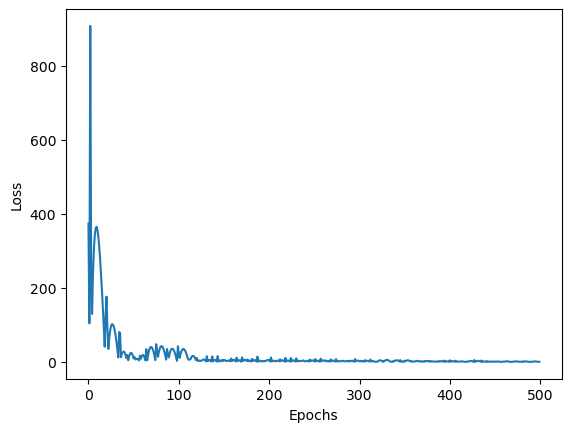

In [31]:
#look at the loss
#plot the loss function
plt.plot(range(epochs),final_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [32]:
#make a list of the results
predictions = []
#turn off gradient computation to speed up testing
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

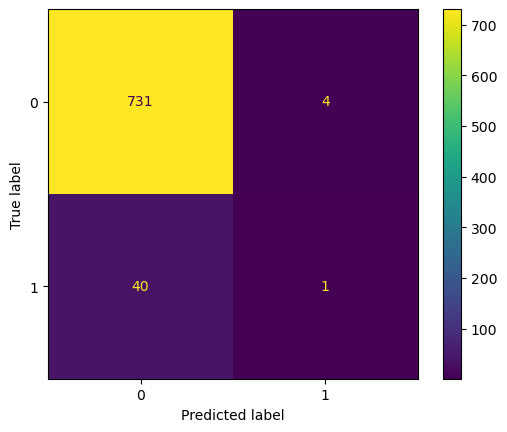

In [33]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [34]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       735
           1       0.20      0.02      0.04        41

    accuracy                           0.94       776
   macro avg       0.57      0.51      0.51       776
weighted avg       0.91      0.94      0.92       776



In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9432989690721649


In [36]:
#try a smaller learning rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [37]:
#set up number of epochs
epochs = 500
#create a list to for plotting - not required - but so you can see the change
final_losses= []
for i in range(epochs):
    #run forward pass
    y_pred=model.forward(X_train)
    #calculate the loss
    loss=loss_function(y_pred,y_train)
    #append for graphing
    final_losses.append(loss.item())
    #don't print all 500 - but some of them
    if i % 10 == 0:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    #Resets or zeros out the previous gradients
    optimizer.zero_grad()
    #computes gradient (dloss/dx) for every parameter x
    loss.backward()
    #update the weights using step
    optimizer.step()

Epoch number: 0 and the loss : 0.6408201456069946
Epoch number: 10 and the loss : 2.811824321746826
Epoch number: 20 and the loss : 0.2671329975128174
Epoch number: 30 and the loss : 0.25701066851615906
Epoch number: 40 and the loss : 0.2505057156085968
Epoch number: 50 and the loss : 0.24836188554763794
Epoch number: 60 and the loss : 0.24620042741298676
Epoch number: 70 and the loss : 0.24526703357696533
Epoch number: 80 and the loss : 0.2444741427898407
Epoch number: 90 and the loss : 0.24385349452495575
Epoch number: 100 and the loss : 0.2430679202079773
Epoch number: 110 and the loss : 0.2420225292444229
Epoch number: 120 and the loss : 0.24035583436489105
Epoch number: 130 and the loss : 0.23999065160751343
Epoch number: 140 and the loss : 0.23957771062850952
Epoch number: 150 and the loss : 0.23930269479751587
Epoch number: 160 and the loss : 0.2391016185283661
Epoch number: 170 and the loss : 0.23891644179821014
Epoch number: 180 and the loss : 0.23879790306091309
Epoch number:

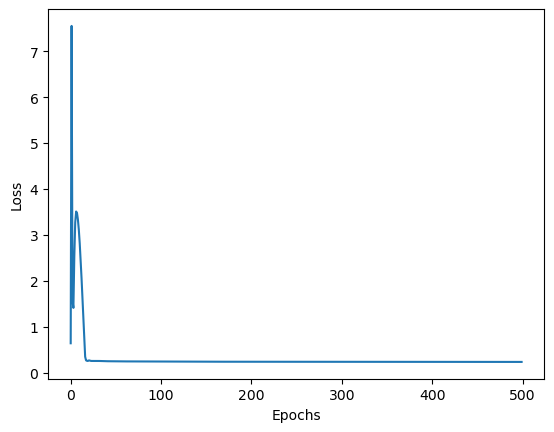

In [38]:
#look at the loss
#plot the loss function
plt.plot(range(epochs),final_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [39]:
#make a list of the results
predictions = []
#turn off gradient computation to speed up testing
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

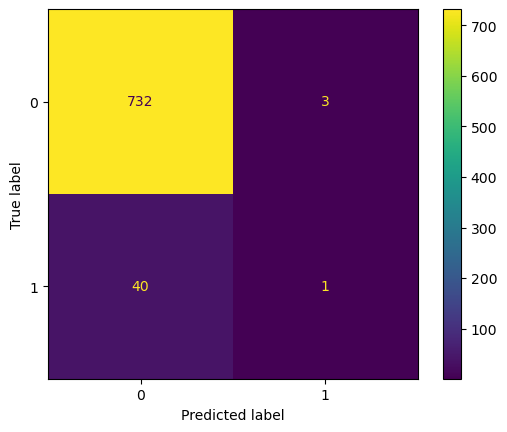

In [40]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [41]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       735
           1       0.25      0.02      0.04        41

    accuracy                           0.94       776
   macro avg       0.60      0.51      0.51       776
weighted avg       0.91      0.94      0.92       776



In [42]:
#make a list of the results
predictions = []
#turn off gradient computation to speed up testing
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9445876288659794


###### Due to terrible classification rates with this model, attempting to add another layer and see what actually happens

In [43]:
#Create Model
class ANN_model3(nn.Module):
    def __init__(self,input_dim=15,hidden1_dim=20, hidden2_dim=10, hidden3_dim=5,out_dim=2):
        '''
        input_dim is 15 because there are 15 columns of features in this set.
        we are setting up 2 hidden layers the first has 20 nodes, the second has 10
        out_dim is 2 because there are two options - diabetic or non-diabetic
        '''
        super().__init__()
        #connent input to first hidden layer
        self.layer1 = nn.Linear(input_dim,hidden1_dim)
        #connect first hidden layer to the second hidden layer
        self.layer2 = nn.Linear(hidden1_dim,hidden2_dim)
        #connect first hidden layer to the second hidden layer
        self.layer3 = nn.Linear(hidden2_dim,hidden3_dim)
        #connect second hidden layer to output
        self.out = nn.Linear(hidden3_dim,out_dim)
        #Note: each layer has a weight and bias that in embedded in the linear layer

    def forward(self,x):
        #compute the output of f_connected1 and apply ReLu
        x = F.relu(self.layer1(x))
        #compute the output of f_connected2 and apply ReLu
        x = F.relu(self.layer2(x))
        #compute the output of f_connected2 and apply ReLu
        x = F.relu(self.layer3(x))
        #compute the output layer
        # no activation: cross entropy will compute softmax
        x = self.out(x)
        return x

In [44]:
#seed pytorch - for reproducibility of setting initial weights
torch.manual_seed(20)
#set up model using the class you made
model = ANN_model3(15,20,30,10).to(device)

#try a learning rate
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [45]:
#set up number of epochs
epochs = 500
#create a list to for plotting - not required - but so you can see the change
final_losses= []
for i in range(epochs):
    #run forward pass
    y_pred=model.forward(X_train)
    #calculate the loss
    loss=loss_function(y_pred,y_train)
    #append for graphing
    final_losses.append(loss.item())
    #don't print all 500 - but some of them
    if i % 20 == 0:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    #Resets or zeros out the previous gradients
    optimizer.zero_grad()
    #computes gradient (dloss/dx) for every parameter x
    loss.backward()
    #update the weights using step
    optimizer.step()

Epoch number: 0 and the loss : 68.25200653076172
Epoch number: 20 and the loss : 17.9123592376709
Epoch number: 40 and the loss : 1.2192864418029785
Epoch number: 60 and the loss : 0.6535449028015137
Epoch number: 80 and the loss : 0.4968571662902832
Epoch number: 100 and the loss : 0.41802263259887695
Epoch number: 120 and the loss : 0.3641941547393799
Epoch number: 140 and the loss : 0.3296578526496887
Epoch number: 160 and the loss : 0.3065899610519409
Epoch number: 180 and the loss : 0.29030635952949524
Epoch number: 200 and the loss : 0.27955058217048645
Epoch number: 220 and the loss : 0.27239155769348145
Epoch number: 240 and the loss : 0.26756858825683594
Epoch number: 260 and the loss : 0.264227956533432
Epoch number: 280 and the loss : 0.2617831528186798
Epoch number: 300 and the loss : 0.2600950300693512
Epoch number: 320 and the loss : 0.25889426469802856
Epoch number: 340 and the loss : 0.25802186131477356
Epoch number: 360 and the loss : 0.25738656520843506
Epoch number: 

In [46]:
#make a list of the results
predictions = []
#turn off gradient computation to speed up testing
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        
        
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       735
           1       0.00      0.00      0.00        41

    accuracy                           0.94       776
   macro avg       0.47      0.50      0.49       776
weighted avg       0.90      0.94      0.92       776



In [65]:
#seed pytorch - for reproducibility of setting initial weights
torch.manual_seed(37)
#set up model using the class you made
model = ANN_model3(15,50,25,5).to(device)

#try a learning rate
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [66]:
#set up number of epochs
epochs = 1000
#create a list to for plotting - not required - but so you can see the change
final_losses= []
for i in range(epochs):
    #run forward pass
    y_pred=model.forward(X_train)
    #calculate the loss
    loss=loss_function(y_pred,y_train)
    #append for graphing
    final_losses.append(loss.item())
    #don't print all 500 - but some of them
    if i % 50 == 0:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    #Resets or zeros out the previous gradients
    optimizer.zero_grad()
    #computes gradient (dloss/dx) for every parameter x
    loss.backward()
    #update the weights using step
    optimizer.step()

Epoch number: 0 and the loss : 782.7827758789062
Epoch number: 50 and the loss : 0.8160468339920044
Epoch number: 100 and the loss : 0.4804190993309021
Epoch number: 150 and the loss : 0.4457610547542572
Epoch number: 200 and the loss : 0.42138808965682983
Epoch number: 250 and the loss : 0.40169212222099304
Epoch number: 300 and the loss : 0.38531216979026794
Epoch number: 350 and the loss : 0.3727818429470062
Epoch number: 400 and the loss : 0.35914772748947144
Epoch number: 450 and the loss : 0.34711310267448425
Epoch number: 500 and the loss : 0.3364848792552948
Epoch number: 550 and the loss : 0.3270943760871887
Epoch number: 600 and the loss : 0.3187936842441559
Epoch number: 650 and the loss : 0.3114542067050934
Epoch number: 700 and the loss : 0.3049626350402832
Epoch number: 750 and the loss : 0.2992200255393982
Epoch number: 800 and the loss : 0.29413914680480957
Epoch number: 850 and the loss : 0.2896437644958496
Epoch number: 900 and the loss : 0.2856665551662445
Epoch numb

In [67]:
#make a list of the results
predictions = []
#turn off gradient computation to speed up testing
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       735
           1       0.00      0.00      0.00        41

    accuracy                           0.95       776
   macro avg       0.47      0.50      0.49       776
weighted avg       0.90      0.95      0.92       776



/home/anerud001/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anerud001/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anerud001/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
# load dataset
data = pd.read_csv("seismic-bumps.csv", header=None, names=col_names)
#take a peek to see if this looks right
data.head()

# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target/Outcome
# use the .drop() method to gather all features except Target/Outcome
# the axis argument refers to columns (1); a 0 would represent rows
scaler.fit(data.drop('class', axis=1))
# Use scaler object to conduct a transform
scaled_features = scaler.transform(data.drop(['class'],axis=1))#this does the standardization



#Here we have the normalized dataset, minus the target/output column which is the lastcol
data_feat = pd.DataFrame(scaled_features, columns= data.columns[:-1])
#see what you did
data_feat.head()

,method,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,-0.732302,-0.77142,-1.343743,-0.327561,-0.872073,-1.050711,-1.211459,-0.307211,-0.629984,-0.502253,-0.510423,-0.242736,-0.068305,-0.243327,-0.221087
1,-0.732302,-0.77142,-1.343743,-0.329568,-0.898738,-1.025805,-1.322299,-0.307211,0.102965,-0.502253,0.789019,-0.242736,-0.068305,-0.145512,-0.117747
2,-0.732302,-0.77142,-1.343743,-0.358675,-0.904071,-1.162786,-1.306465,-0.307211,-0.629984,-0.502253,-0.510423,-0.242736,-0.068305,-0.243327,-0.221087
3,-0.732302,-0.77142,-1.343743,-0.268038,-0.653424,-0.440526,0.561974,-0.307211,0.102965,-0.502253,0.789019,-0.242736,-0.068305,-0.096605,-0.066078
4,-0.732302,-0.77142,-1.343743,-0.338645,-0.856075,-0.938636,-0.894775,-0.307211,-0.629984,-0.502253,-0.510423,-0.242736,-0.068305,-0.243327,-0.221087


In [69]:
X = data[feature_cols] # Features
y = data['class'] # Target variable - notice - you need to spell
#column name for the target correctly for this to work

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 70% training and 30% test

# Creating Tensors
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [70]:
#seed pytorch - for reproducibility of setting initial weights
torch.manual_seed(2)
#set up model using the class you made
model = ANN_model3(15,50,25,5).to(device)

#try a learning rate
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [71]:
#set up number of epochs
epochs = 500
#create a list to for plotting - not required - but so you can see the change
final_losses= []
for i in range(epochs):
    #run forward pass
    y_pred=model.forward(X_train)
    #calculate the loss
    loss=loss_function(y_pred,y_train)
    #append for graphing
    final_losses.append(loss.item())
    #don't print all 500 - but some of them
    if i % 50 == 0:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    #Resets or zeros out the previous gradients
    optimizer.zero_grad()
    #computes gradient (dloss/dx) for every parameter x
    loss.backward()
    #update the weights using step
    optimizer.step()

Epoch number: 0 and the loss : 247.60035705566406
Epoch number: 50 and the loss : 0.686169445514679
Epoch number: 100 and the loss : 0.5231450796127319
Epoch number: 150 and the loss : 0.4848271906375885
Epoch number: 200 and the loss : 0.45871803164482117
Epoch number: 250 and the loss : 0.43557509779930115
Epoch number: 300 and the loss : 0.41506388783454895
Epoch number: 350 and the loss : 0.39672523736953735
Epoch number: 400 and the loss : 0.3803122937679291
Epoch number: 450 and the loss : 0.3656165599822998


In [72]:
#make a list of the results
predictions = []
#turn off gradient computation to speed up testing
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       735
           1       0.00      0.00      0.00        41

    accuracy                           0.94       776
   macro avg       0.47      0.50      0.48       776
weighted avg       0.90      0.94      0.92       776



In [73]:
#Create Model
class ANN_model3(nn.Module):
    def __init__(self,input_dim=15,hidden1_dim=20, hidden2_dim=10, hidden3_dim=5,out_dim=2):
        '''
        input_dim is 15 because there are 15 columns of features in this set.
        we are setting up 2 hidden layers the first has 20 nodes, the second has 10
        out_dim is 2 because there are two options - diabetic or non-diabetic
        '''
        super().__init__()
        #connent input to first hidden layer
        self.layer1 = nn.Linear(input_dim,hidden1_dim)
        #connect hidden layer to output
        self.out = nn.Linear(hidden1_dim,out_dim)
        #Note: each layer has a weight and bias that in embedded in the linear layer

    def forward(self,x):
        #compute the output of f_connected1 and apply ReLu
        x = F.relu(self.layer1(x))
        #compute the output layer
        # no activation: cross entropy will compute softmax
        x = self.out(x)
        return x

In [76]:
#seed pytorch - for reproducibility of setting initial weights
torch.manual_seed(20)
#set up model using the class you made
model = ANN_model3(15).to(device)

#try a learning rate
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [78]:
#set up number of epochs
epochs = 1000
#create a list to for plotting - not required - but so you can see the change
final_losses= []
for i in range(epochs):
    #run forward pass
    y_pred=model.forward(X_train)
    #calculate the loss
    loss=loss_function(y_pred,y_train)
    #append for graphing
    final_losses.append(loss.item())
    #don't print all 500 - but some of them
    if i % 20 == 0:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    #Resets or zeros out the previous gradients
    optimizer.zero_grad()
    #computes gradient (dloss/dx) for every parameter x
    loss.backward()
    #update the weights using step
    optimizer.step()

Epoch number: 0 and the loss : 25.9211368560791
Epoch number: 20 and the loss : 91.5986557006836
Epoch number: 40 and the loss : 28.918100357055664
Epoch number: 60 and the loss : 17.746952056884766
Epoch number: 80 and the loss : 32.020347595214844
Epoch number: 100 and the loss : 15.495553970336914
Epoch number: 120 and the loss : 9.075689315795898
Epoch number: 140 and the loss : 36.1990852355957
Epoch number: 160 and the loss : 96.53797149658203
Epoch number: 180 and the loss : 68.83866882324219
Epoch number: 200 and the loss : 27.621335983276367
Epoch number: 220 and the loss : 21.30971908569336
Epoch number: 240 and the loss : 18.898801803588867
Epoch number: 260 and the loss : 5.082952499389648
Epoch number: 280 and the loss : 10.702458381652832
Epoch number: 300 and the loss : 15.098030090332031
Epoch number: 320 and the loss : 15.943832397460938
Epoch number: 340 and the loss : 15.263337135314941
Epoch number: 360 and the loss : 9.847640037536621
Epoch number: 380 and the loss

In [80]:
#make a list of the results
predictions = []
#turn off gradient computation to speed up testing
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        
        
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       735
           1       0.00      0.00      0.00        41

    accuracy                           0.95       776
   macro avg       0.47      0.50      0.49       776
weighted avg       0.90      0.95      0.92       776



/home/anerud001/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anerud001/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anerud001/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Thoughts
<p>The above is the best I was able to get the accuracy with around 95%. However, I have come to the terms that for some reason this algorithm is not able to identify any of the data that is true. I've tried having different splits of data, different random seeds and so forth, but for some reason it still doesn't identify the data properly. The best accuracy I have received was from the model that got one true correctly defined. Otherwise the best overall accuracy I received was from the three layers. This makes me think that it also could be due to bad data overall, since with other models I was getting ~94% every time </p>

# Trying with other dataset

In [13]:
# Load libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier # Import RandomForest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#make sure you have your labels correct
#some files have this in the file - others it is in the description
col_names = ['ACCESS_ALL_DOWNLOADS','ACCESS_CACHE_FILESYSTEM','ACCESS_CHECKIN_PROPERTIES',
                'ACCESS_COARSE_LOCATION','ACCESS_COARSE_UPDATES','ACCESS_FINE_LOCATION',
                'ACCESS_LOCATION_EXTRA_COMMANDS','ACCESS_MOCK_LOCATION','ACCESS_MTK_MMHW',
                'ACCESS_NETWORK_STATE','ACCESS_PROVIDER','ACCESS_SERVICE','ACCESS_SHARED_DATA',
                'ACCESS_SUPERUSER','ACCESS_SURFACE_FLINGER','ACCESS_WIFI_STATE','activityCalled',
                'ACTIVITY_RECOGNITION','ACCOUNT_MANAGER','ADD_VOICEMAIL','ANT','ANT_ADMIN',
                'AUTHENTICATE_ACCOUNTS','AUTORUN_MANAGER_LICENSE_MANAGER','AUTORUN_MANAGER_LICENSE_SERVICE(.autorun)',
                'BATTERY_STATS','BILLING','BIND_ACCESSIBILITY_SERVICE','BIND_APPWIDGET',
                'BIND_CARRIER_MESSAGING_SERVICE','BIND_DEVICE_ADMIN','BIND_DREAM_SERVICE',
                'BIND_GET_INSTALL_REFERRER_SERVICE','BIND_INPUT_METHOD','BIND_NFC_SERVICE',
                'BIND_goodwareTIFICATION_LISTENER_SERVICE','BIND_PRINT_SERVICE','BIND_REMOTEVIEWS',
                'BIND_TEXT_SERVICE','BIND_TV_INPUT','BIND_VOICE_INTERACTION','BIND_VPN_SERVICE',
                'BIND_WALLPAPER','BLUETOOTH','BLUETOOTH_ADMIN','BLUETOOTH_PRIVILEGED','BODY_SENSORS',
                'BRICK','BROADCAST_PACKAGE_REMOVED','BROADCAST_SMS','BROADCAST_STICKY','BROADCAST_WAP_PUSH',
                'C2D_MESSAGE','CALL_PHONE','CALL_PRIVILEGED','CAMERA','CAPTURE_AUDIO_OUTPUT',
                'CAPTURE_SECURE_VIDEO_OUTPUT','CAPTURE_VIDEO_OUTPUT','CHANGE_COMPONENT_ENABLED_STATE',
                'CHANGE_CONFIGURATION','CHANGE_DISPLAY_MODE','CHANGE_NETWORK_STATE',
                'CHANGE_WIFI_MULTICAST_STATE','CHANGE_WIFI_STATE','CHECK_LICENSE','CLEAR_APP_CACHE',
                'CLEAR_APP_USER_DATA','CONTROL_LOCATION_UPDATES','DATABASE_INTERFACE_SERVICE',
                'DELETE_CACHE_FILES','DELETE_PACKAGES','DEVICE_POWER','DIAGgoodwareSTIC','DISABLE_KEYGUARD',
                'DOWNLOAD_SERVICE','DOWNLOAD_WITHOUT_goodwareTIFICATION','DUMP','EXPAND_STATUS_BAR',
                'EXTENSION_PERMISSION','FACTORY_TEST','FLASHLIGHT','FORCE_BACK','FULLSCREEN.FULL',
                'GET_ACCOUNTS','GET_PACKAGE_SIZE','GET_TASKS','GET_TOP_ACTIVITY_INFO','GLOBAL_SEARCH',
                'GOOGLE_AUTH','GOOGLE_PHOTOS','HARDWARE_TEST','INJECT_EVENTS','INSTALL_LOCATION_PROVIDER',
                'INSTALL_PACKAGES','INSTALL_SHORTCUT','INTERACT_ACROSS_USERS','INTERNAL_SYSTEM_WINDOW',
                'INTERNET','JPUSH_MESSAGE','KILL_BACKGROUND_PROCESSES','LOCATION_HARDWARE','MANAGE_ACCOUNTS',
                'MANAGE_APP_TOKENS','MANAGE_DOCUMENTS','MAPS_RECEIVE','MASTER_CLEAR','MEDIA_BUTTON',
                'MEDIA_CONTENT_CONTROL','MESSAGE','MODIFY_AUDIO_SETTINGS','MODIFY_PHONE_STATE',
                'MOUNT_FORMAT_FILESYSTEMS','MOUNT_UNMOUNT_FILESYSTEMS','NFC','PERSISTENT_ACTIVITY',
                'PERMISSION','PERMISSION_RUN_TASKS','PLUGIN','PROCESS_OUTGOING_CALLS','READ',
                'READ_ATTACHMENT','READ_AVESTTINGS','READ_CALENDAR','READ_CALL_LOG','READ_CONTACTS',
                'READ_CONTENT_PROVIDER','READ_DATA','READ_DATABASES','READ_EXTERNAL_STORAGE',
                'READ_FRAME_BUFFER','READ_GMAIL','READ_GSERVICES','READ_HISTORY_BOOKMARKS',
                'READ_INPUT_STATE','READ_LOGS','READ_MESSAGES','READ_OWNER_DATA','READ_PHONE_STATE',
                'READ_PROFILE','READ_SETTINGS','READ_SMS','READ_SOCIAL_STREAM','READ_SYNC_SETTINGS',
                'READ_SYNC_STATS','READ_USER_DICTIONARY','READ_VOICEMAIL','REBOOT','RECEIVE',
                'RECEIVE_BOOT_COMPLETED','RECEIVE_MMS','RECEIVE_SIGNED_DATA_RESULT','RECEIVE_SMS',
                'RECEIVE_USER_PRESENT','RECEIVE_WAP_PUSH','RECORD_AUDIO','REORDER_TASKS','RESPOND',
                'RESTART_PACKAGES','REQUEST','SDCARD_WRITE','SEND','SEND_RESPOND_VIA_MESSAGE','SEND_SMS',
                'SET_ACTIVITY_WATCHER','SET_ALARM','SET_ALWAYS_FINISH','SET_ANIMATION_SCALE','SET_DEBUG_APP',
                'SET_ORIENTATION','SET_POINTER_SPEED','SET_PREFERRED_APPLICATIONS','SET_PROCESS_LIMIT',
                'SET_TIME','SET_TIME_ZONE','SET_WALLPAPER','SET_WALLPAPER_HINTS',
                'SIGNAL_PERSISTENT_PROCESSES','STATUS_BAR','STORAGE','SUBSCRIBED_FEEDS_READ',
                'SUBSCRIBED_FEEDS_WRITE','SYSTEM_ALERT_WINDOW','TRANSMIT_IR','UNINSTALL_SHORTCUT',
                'UPDATE_DEVICE_STATS','USES_POLICY_FORCE_LOCK','USE_CREDENTIALS','USE_FINGERPRINT',
                'USE_SIP','VIBRATE','WAKE_LOCK','WRITE','WRITE_APN_SETTINGS','WRITE_AVSETTING',
                'WRITE_CALENDAR','WRITE_CALL_LOG','WRITE_CONTACTS','WRITE_DATA','WRITE_DATABASES',
                'WRITE_EXTERNAL_STORAGE','WRITE_GSERVICES','WRITE_HISTORY_BOOKMARKS',
                'WRITE_INTERNAL_STORAGE','WRITE_MEDIA_STORAGE','WRITE_OWNER_DATA','WRITE_PROFILE',
                'WRITE_SECURE_SETTINGS','WRITE_SETTINGS','WRITE_SMS','WRITE_SOCIAL_STREAM',
                'WRITE_SYNC_SETTINGS','WRITE_USER_DICTIONARY','WRITE_VOICEMAIL',
                'Ljava/lang/reflect/Method;->invoke','Ljavax/crypto/Cipher;->doFinal',
                'Ljava/lang/Runtime;->exec','Ljava/lang/System;->load',
                'Ldalvik/system/DexClassLoader;->loadClass','Ljava/lang/System;->loadLibrary',
                'Ljava/net/URL;->openConnection','Landroid/hardware/Camera;->open',
                'Landroid/hardware/Camera;->takePicture',
                'Landroid/telephony/SmsManager;->sendMultipartTextMessage',
                'Landroid/telephony/SmsManager;->sendTextMessage',
                'Landroid/media/AudioRecord;->startRecording',
                'Landroid/telephony/TelephonyManager;->getCellLocation',
                'Lcom/google/android/gms/location/LocationClient;->getLastLocation',
                'Landroid/location/LocationManager;->getLastKgoodwarewnLocation',
                'Landroid/telephony/TelephonyManager;->getDeviceId',
                'Landroid/content/pm/PackageManager;->getInstalledApplications',
                'Landroid/content/pm/PackageManager;->getInstalledPackages',
                'Landroid/telephony/TelephonyManager;->getLine1Number',
                'Landroid/telephony/TelephonyManager;->getNetworkOperator',
                'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
                'Landroid/telephony/TelephonyManager;->getNetworkCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimOperator',
                'Landroid/telephony/TelephonyManager;->getSimOperatorName',
                'Landroid/telephony/TelephonyManager;->getSimCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimSerialNumber',
                'Lorg/apache/http/impl/client/DefaultHttpClient;->execute',
                'Label']
# load dataset
data = pd.read_csv("TUANDROMD.csv", header=None, names=col_names, low_memory=False)
#take a peek to see if this looks right
data.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
#split dataset in features and target variable
feature_cols = ['ACCESS_ALL_DOWNLOADS','ACCESS_CACHE_FILESYSTEM','ACCESS_CHECKIN_PROPERTIES',
                'ACCESS_COARSE_LOCATION','ACCESS_COARSE_UPDATES','ACCESS_FINE_LOCATION',
                'ACCESS_LOCATION_EXTRA_COMMANDS','ACCESS_MOCK_LOCATION','ACCESS_MTK_MMHW',
                'ACCESS_NETWORK_STATE','ACCESS_PROVIDER','ACCESS_SERVICE','ACCESS_SHARED_DATA',
                'ACCESS_SUPERUSER','ACCESS_SURFACE_FLINGER','ACCESS_WIFI_STATE','activityCalled',
                'ACTIVITY_RECOGNITION','ACCOUNT_MANAGER','ADD_VOICEMAIL','ANT','ANT_ADMIN',
                'AUTHENTICATE_ACCOUNTS','AUTORUN_MANAGER_LICENSE_MANAGER','AUTORUN_MANAGER_LICENSE_SERVICE(.autorun)',
                'BATTERY_STATS','BILLING','BIND_ACCESSIBILITY_SERVICE','BIND_APPWIDGET',
                'BIND_CARRIER_MESSAGING_SERVICE','BIND_DEVICE_ADMIN','BIND_DREAM_SERVICE',
                'BIND_GET_INSTALL_REFERRER_SERVICE','BIND_INPUT_METHOD','BIND_NFC_SERVICE',
                'BIND_goodwareTIFICATION_LISTENER_SERVICE','BIND_PRINT_SERVICE','BIND_REMOTEVIEWS',
                'BIND_TEXT_SERVICE','BIND_TV_INPUT','BIND_VOICE_INTERACTION','BIND_VPN_SERVICE',
                'BIND_WALLPAPER','BLUETOOTH','BLUETOOTH_ADMIN','BLUETOOTH_PRIVILEGED','BODY_SENSORS',
                'BRICK','BROADCAST_PACKAGE_REMOVED','BROADCAST_SMS','BROADCAST_STICKY','BROADCAST_WAP_PUSH',
                'C2D_MESSAGE','CALL_PHONE','CALL_PRIVILEGED','CAMERA','CAPTURE_AUDIO_OUTPUT',
                'CAPTURE_SECURE_VIDEO_OUTPUT','CAPTURE_VIDEO_OUTPUT','CHANGE_COMPONENT_ENABLED_STATE',
                'CHANGE_CONFIGURATION','CHANGE_DISPLAY_MODE','CHANGE_NETWORK_STATE',
                'CHANGE_WIFI_MULTICAST_STATE','CHANGE_WIFI_STATE','CHECK_LICENSE','CLEAR_APP_CACHE',
                'CLEAR_APP_USER_DATA','CONTROL_LOCATION_UPDATES','DATABASE_INTERFACE_SERVICE',
                'DELETE_CACHE_FILES','DELETE_PACKAGES','DEVICE_POWER','DIAGgoodwareSTIC','DISABLE_KEYGUARD',
                'DOWNLOAD_SERVICE','DOWNLOAD_WITHOUT_goodwareTIFICATION','DUMP','EXPAND_STATUS_BAR',
                'EXTENSION_PERMISSION','FACTORY_TEST','FLASHLIGHT','FORCE_BACK','FULLSCREEN.FULL',
                'GET_ACCOUNTS','GET_PACKAGE_SIZE','GET_TASKS','GET_TOP_ACTIVITY_INFO','GLOBAL_SEARCH',
                'GOOGLE_AUTH','GOOGLE_PHOTOS','HARDWARE_TEST','INJECT_EVENTS','INSTALL_LOCATION_PROVIDER',
                'INSTALL_PACKAGES','INSTALL_SHORTCUT','INTERACT_ACROSS_USERS','INTERNAL_SYSTEM_WINDOW',
                'INTERNET','JPUSH_MESSAGE','KILL_BACKGROUND_PROCESSES','LOCATION_HARDWARE','MANAGE_ACCOUNTS',
                'MANAGE_APP_TOKENS','MANAGE_DOCUMENTS','MAPS_RECEIVE','MASTER_CLEAR','MEDIA_BUTTON',
                'MEDIA_CONTENT_CONTROL','MESSAGE','MODIFY_AUDIO_SETTINGS','MODIFY_PHONE_STATE',
                'MOUNT_FORMAT_FILESYSTEMS','MOUNT_UNMOUNT_FILESYSTEMS','NFC','PERSISTENT_ACTIVITY',
                'PERMISSION','PERMISSION_RUN_TASKS','PLUGIN','PROCESS_OUTGOING_CALLS','READ',
                'READ_ATTACHMENT','READ_AVESTTINGS','READ_CALENDAR','READ_CALL_LOG','READ_CONTACTS',
                'READ_CONTENT_PROVIDER','READ_DATA','READ_DATABASES','READ_EXTERNAL_STORAGE',
                'READ_FRAME_BUFFER','READ_GMAIL','READ_GSERVICES','READ_HISTORY_BOOKMARKS',
                'READ_INPUT_STATE','READ_LOGS','READ_MESSAGES','READ_OWNER_DATA','READ_PHONE_STATE',
                'READ_PROFILE','READ_SETTINGS','READ_SMS','READ_SOCIAL_STREAM','READ_SYNC_SETTINGS',
                'READ_SYNC_STATS','READ_USER_DICTIONARY','READ_VOICEMAIL','REBOOT','RECEIVE',
                'RECEIVE_BOOT_COMPLETED','RECEIVE_MMS','RECEIVE_SIGNED_DATA_RESULT','RECEIVE_SMS',
                'RECEIVE_USER_PRESENT','RECEIVE_WAP_PUSH','RECORD_AUDIO','REORDER_TASKS','RESPOND',
                'RESTART_PACKAGES','REQUEST','SDCARD_WRITE','SEND','SEND_RESPOND_VIA_MESSAGE','SEND_SMS',
                'SET_ACTIVITY_WATCHER','SET_ALARM','SET_ALWAYS_FINISH','SET_ANIMATION_SCALE','SET_DEBUG_APP',
                'SET_ORIENTATION','SET_POINTER_SPEED','SET_PREFERRED_APPLICATIONS','SET_PROCESS_LIMIT',
                'SET_TIME','SET_TIME_ZONE','SET_WALLPAPER','SET_WALLPAPER_HINTS',
                'SIGNAL_PERSISTENT_PROCESSES','STATUS_BAR','STORAGE','SUBSCRIBED_FEEDS_READ',
                'SUBSCRIBED_FEEDS_WRITE','SYSTEM_ALERT_WINDOW','TRANSMIT_IR','UNINSTALL_SHORTCUT',
                'UPDATE_DEVICE_STATS','USES_POLICY_FORCE_LOCK','USE_CREDENTIALS','USE_FINGERPRINT',
                'USE_SIP','VIBRATE','WAKE_LOCK','WRITE','WRITE_APN_SETTINGS','WRITE_AVSETTING',
                'WRITE_CALENDAR','WRITE_CALL_LOG','WRITE_CONTACTS','WRITE_DATA','WRITE_DATABASES',
                'WRITE_EXTERNAL_STORAGE','WRITE_GSERVICES','WRITE_HISTORY_BOOKMARKS',
                'WRITE_INTERNAL_STORAGE','WRITE_MEDIA_STORAGE','WRITE_OWNER_DATA','WRITE_PROFILE',
                'WRITE_SECURE_SETTINGS','WRITE_SETTINGS','WRITE_SMS','WRITE_SOCIAL_STREAM',
                'WRITE_SYNC_SETTINGS','WRITE_USER_DICTIONARY','WRITE_VOICEMAIL',
                'Ljava/lang/reflect/Method;->invoke','Ljavax/crypto/Cipher;->doFinal',
                'Ljava/lang/Runtime;->exec','Ljava/lang/System;->load',
                'Ldalvik/system/DexClassLoader;->loadClass','Ljava/lang/System;->loadLibrary',
                'Ljava/net/URL;->openConnection','Landroid/hardware/Camera;->open',
                'Landroid/hardware/Camera;->takePicture',
                'Landroid/telephony/SmsManager;->sendMultipartTextMessage',
                'Landroid/telephony/SmsManager;->sendTextMessage',
                'Landroid/media/AudioRecord;->startRecording',
                'Landroid/telephony/TelephonyManager;->getCellLocation',
                'Lcom/google/android/gms/location/LocationClient;->getLastLocation',
                'Landroid/location/LocationManager;->getLastKgoodwarewnLocation',
                'Landroid/telephony/TelephonyManager;->getDeviceId',
                'Landroid/content/pm/PackageManager;->getInstalledApplications',
                'Landroid/content/pm/PackageManager;->getInstalledPackages',
                'Landroid/telephony/TelephonyManager;->getLine1Number',
                'Landroid/telephony/TelephonyManager;->getNetworkOperator',
                'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
                'Landroid/telephony/TelephonyManager;->getNetworkCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimOperator',
                'Landroid/telephony/TelephonyManager;->getSimOperatorName',
                'Landroid/telephony/TelephonyManager;->getSimCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimSerialNumber',
                'Lorg/apache/http/impl/client/DefaultHttpClient;->execute']

X = data[feature_cols] # Features
y = data['Label'] # Target variable - notice - you need to spell the column name for the target correctly for this to work

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 70% training and 30% test

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 70% training and 30% test

# Creating Tensors
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [16]:
# Get cpu, gpu or mps device for training.
device = (
"cuda"
if torch.cuda.is_available()
else "mps"
if torch.backends.mps.is_available()
else "cpu"
)

#Create Model
class ANN_model(nn.Module):
    def __init__(self,input_dim=241,hidden1_dim=100, hidden2_dim=20,out_dim=2):
        '''
        input_dim is 15 because there are 15 columns of features in this set.
        we are setting up 2 hidden layers the first has 20 nodes, the second has 10
        out_dim is 2 because there are two options - diabetic or non-diabetic
        '''
        super().__init__()
        #connent input to first hidden layer
        self.layer1 = nn.Linear(input_dim,hidden1_dim)
        #connect first hidden layer to the second hidden layer
        self.layer2 = nn.Linear(hidden1_dim,hidden2_dim)
        #connect second hidden layer to output
        self.out = nn.Linear(hidden2_dim,out_dim)
        #Note: each layer has a weight and bias that in embedded in the linear layer

    def forward(self,x):
        #compute the output of f_connected1 and apply ReLu
        x = F.relu(self.layer1(x))
        #compute the output of f_connected2 and apply ReLu
        x = F.relu(self.layer2(x))
        #compute the output layer
        # no activation: cross entropy will compute softmax
        x = self.out(x)
        return x

In [17]:
#seed pytorch - for reproducibility of setting initial weights
torch.manual_seed(20)
#set up model using the class you made
model = ANN_model().to(device)

In [19]:
#print out the model
print(model)

ANN_model(
  (layer1): Linear(in_features=241, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)


In [20]:
# Backward Propagation - loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [21]:
#set up number of epochs
epochs = 500
#create a list to for plotting - not required - but so you can see the change
final_losses= []
for i in range(epochs):
    #run forward pass
    y_pred=model.forward(X_train)
    #calculate the loss
    loss=loss_function(y_pred,y_train)
    #append for graphing
    final_losses.append(loss.item())
    #don't print all 500 - but some of them
    if i % 10 == 0:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    #Resets or zeros out the previous gradients
    optimizer.zero_grad()
    #computes gradient (dloss/dx) for every parameter x
    loss.backward()
    #update the weights using step
    optimizer.step()

Epoch number: 0 and the loss : 0.6848992705345154
Epoch number: 10 and the loss : 0.08980214595794678
Epoch number: 20 and the loss : 0.047394976019859314
Epoch number: 30 and the loss : 0.02867731638252735
Epoch number: 40 and the loss : 0.020950492471456528
Epoch number: 50 and the loss : 0.01639767736196518
Epoch number: 60 and the loss : 0.013028034940361977
Epoch number: 70 and the loss : 0.010979165323078632
Epoch number: 80 and the loss : 0.009803170338273048
Epoch number: 90 and the loss : 0.009133022278547287
Epoch number: 100 and the loss : 0.008730581030249596
Epoch number: 110 and the loss : 0.008487886749207973
Epoch number: 120 and the loss : 0.00832640752196312
Epoch number: 130 and the loss : 0.008212215267121792
Epoch number: 140 and the loss : 0.008130121976137161
Epoch number: 150 and the loss : 0.008068675175309181
Epoch number: 160 and the loss : 0.008022033609449863
Epoch number: 170 and the loss : 0.007985804229974747
Epoch number: 180 and the loss : 0.0079569220

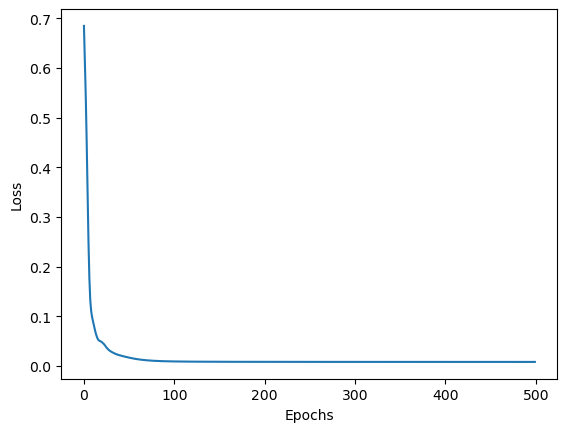

In [22]:
#look at the loss
#plot the loss function
plt.plot(range(epochs),final_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [23]:
#make a list of the results
predictions = []
#turn off gradient computation to speed up testing
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

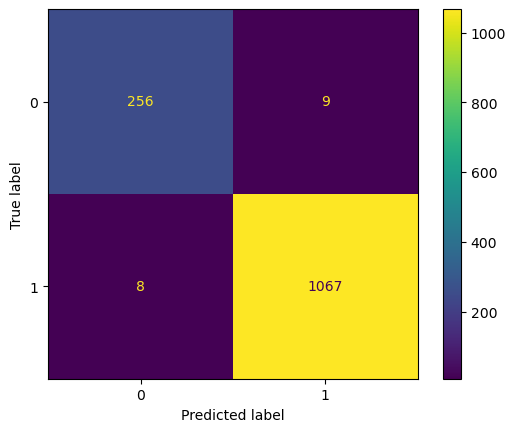

In [24]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [27]:
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       265
           1       0.99      0.99      0.99      1075

    accuracy                           0.99      1340
   macro avg       0.98      0.98      0.98      1340
weighted avg       0.99      0.99      0.99      1340

0.9873134328358208


In [28]:
# Backward Propagation - loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [29]:
#set up number of epochs
epochs = 701
#create a list to for plotting - not required - but so you can see the change
final_losses= []
for i in range(epochs):
    #run forward pass
    y_pred=model.forward(X_train)
    #calculate the loss
    loss=loss_function(y_pred,y_train)
    #append for graphing
    final_losses.append(loss.item())
    #don't print all 500 - but some of them
    if i % 50 == 0:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    #Resets or zeros out the previous gradients
    optimizer.zero_grad()
    #computes gradient (dloss/dx) for every parameter x
    loss.backward()
    #update the weights using step
    optimizer.step()

Epoch number: 0 and the loss : 0.007778442930430174
Epoch number: 50 and the loss : 0.0074357325211167336
Epoch number: 100 and the loss : 0.007429793477058411
Epoch number: 150 and the loss : 0.007428756449371576
Epoch number: 200 and the loss : 0.007428323850035667
Epoch number: 250 and the loss : 0.007428073789924383
Epoch number: 300 and the loss : 0.007427920121699572
Epoch number: 350 and the loss : 0.007427910342812538
Epoch number: 400 and the loss : 0.007427760865539312
Epoch number: 450 and the loss : 0.007427713833749294
Epoch number: 500 and the loss : 0.007427678443491459
Epoch number: 550 and the loss : 0.007427653763443232
Epoch number: 600 and the loss : 0.007427631411701441
Epoch number: 650 and the loss : 0.0074276430532336235
Epoch number: 700 and the loss : 0.00742767471820116


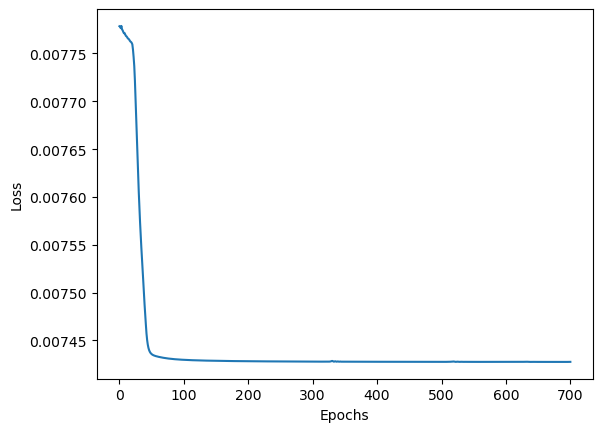

In [30]:
#look at the loss
#plot the loss function
plt.plot(range(epochs),final_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [31]:
#make a list of the results
predictions = []
#turn off gradient computation to speed up testing
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

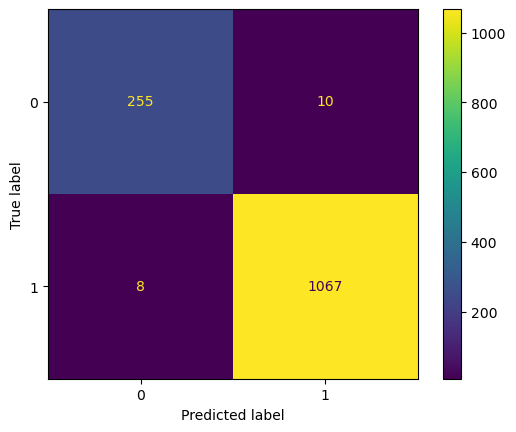

In [32]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [33]:
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       265
           1       0.99      0.99      0.99      1075

    accuracy                           0.99      1340
   macro avg       0.98      0.98      0.98      1340
weighted avg       0.99      0.99      0.99      1340

0.9865671641791045


# Trying with different # layers

In [38]:
# Get cpu, gpu or mps device for training.
device = (
"cuda"
if torch.cuda.is_available()
else "mps"
if torch.backends.mps.is_available()
else "cpu"
)

#Create Model
class ANN_model2(nn.Module):
    def __init__(self,input_dim=241,hidden1_dim=120, hidden2_dim=60,hidden3_dim=30, hidden4_dim=10,out_dim=2):
        '''
        input_dim is 15 because there are 15 columns of features in this set.
        we are setting up 2 hidden layers the first has 20 nodes, the second has 10
        out_dim is 2 because there are two options - diabetic or non-diabetic
        '''
        super().__init__()
        #connent input to first hidden layer
        self.layer1 = nn.Linear(input_dim,hidden1_dim)
        #connect first hidden layer to the second hidden layer
        self.layer2 = nn.Linear(hidden1_dim,hidden2_dim)
        #connent input to first hidden layer
        self.layer3 = nn.Linear(hidden2_dim,hidden3_dim)
        #connect first hidden layer to the second hidden layer
        self.layer4 = nn.Linear(hidden3_dim,hidden4_dim)
        #connect second hidden layer to output
        self.out = nn.Linear(hidden4_dim,out_dim)
        #Note: each layer has a weight and bias that in embedded in the linear layer

    def forward(self,x):
        #compute the output of f_connected1 and apply ReLu
        x = F.relu(self.layer1(x))
        #compute the output of f_connected2 and apply ReLu
        x = F.relu(self.layer2(x))
        #compute the output of f_connected1 and apply ReLu
        x = F.relu(self.layer3(x))
        #compute the output of f_connected2 and apply ReLu
        x = F.relu(self.layer4(x))
        #compute the output layer
        # no activation: cross entropy will compute softmax
        x = self.out(x)
        return x

In [39]:
#seed pytorch - for reproducibility of setting initial weights
torch.manual_seed(20)
#set up model using the class you made
model = ANN_model2().to(device)

In [40]:
#print out the model
print(model)

ANN_model2(
  (layer1): Linear(in_features=241, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=60, bias=True)
  (layer3): Linear(in_features=60, out_features=30, bias=True)
  (layer4): Linear(in_features=30, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [41]:
# Backward Propagation - loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [42]:
#set up number of epochs
epochs = 500
#create a list to for plotting - not required - but so you can see the change
final_losses= []
for i in range(epochs):
    #run forward pass
    y_pred=model.forward(X_train)
    #calculate the loss
    loss=loss_function(y_pred,y_train)
    #append for graphing
    final_losses.append(loss.item())
    #don't print all 500 - but some of them
    if i % 10 == 0:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    #Resets or zeros out the previous gradients
    optimizer.zero_grad()
    #computes gradient (dloss/dx) for every parameter x
    loss.backward()
    #update the weights using step
    optimizer.step()

Epoch number: 0 and the loss : 0.6543000936508179
Epoch number: 10 and the loss : 0.15086893737316132
Epoch number: 20 and the loss : 0.058246247470378876
Epoch number: 30 and the loss : 0.03320645913481712
Epoch number: 40 and the loss : 0.019139891490340233
Epoch number: 50 and the loss : 0.01172997523099184
Epoch number: 60 and the loss : 0.008879479020833969
Epoch number: 70 and the loss : 0.008231102488934994
Epoch number: 80 and the loss : 0.007981032133102417
Epoch number: 90 and the loss : 0.007821074686944485
Epoch number: 100 and the loss : 0.007716369349509478
Epoch number: 110 and the loss : 0.007645478006452322
Epoch number: 120 and the loss : 0.007596021983772516
Epoch number: 130 and the loss : 0.007559673860669136
Epoch number: 140 and the loss : 0.007532372605055571
Epoch number: 150 and the loss : 0.00751198036596179
Epoch number: 160 and the loss : 0.007496604695916176
Epoch number: 170 and the loss : 0.007484853267669678
Epoch number: 180 and the loss : 0.0074757691

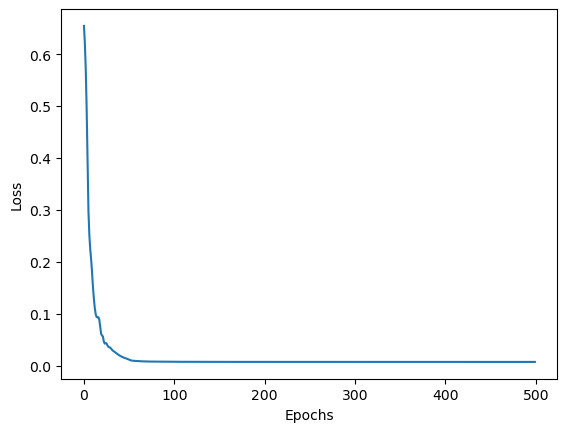

In [43]:
#look at the loss
#plot the loss function
plt.plot(range(epochs),final_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [44]:
#make a list of the results
predictions = []
#turn off gradient computation to speed up testing
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

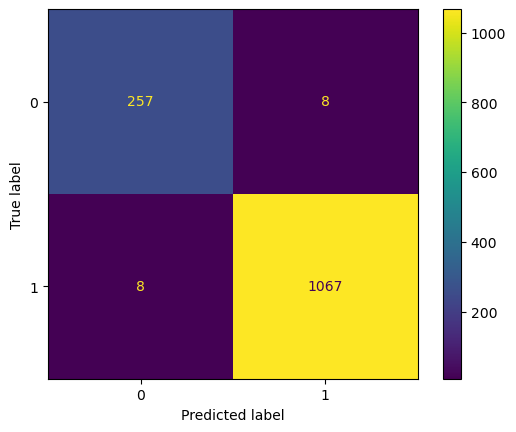

In [45]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [46]:
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       265
           1       0.99      0.99      0.99      1075

    accuracy                           0.99      1340
   macro avg       0.98      0.98      0.98      1340
weighted avg       0.99      0.99      0.99      1340

0.9880597014925373


In [47]:
#seed pytorch - for reproducibility of setting initial weights
torch.manual_seed(20)
#set up model using the class you made
model = ANN_model2().to(device)

In [48]:
#print out the model
print(model)

ANN_model2(
  (layer1): Linear(in_features=241, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=60, bias=True)
  (layer3): Linear(in_features=60, out_features=30, bias=True)
  (layer4): Linear(in_features=30, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [49]:
# Backward Propagation - loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [50]:
#set up number of epochs
epochs = 500
#create a list to for plotting - not required - but so you can see the change
final_losses= []
for i in range(epochs):
    #run forward pass
    y_pred=model.forward(X_train)
    #calculate the loss
    loss=loss_function(y_pred,y_train)
    #append for graphing
    final_losses.append(loss.item())
    #don't print all 500 - but some of them
    if i % 50 == 0:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    #Resets or zeros out the previous gradients
    optimizer.zero_grad()
    #computes gradient (dloss/dx) for every parameter x
    loss.backward()
    #update the weights using step
    optimizer.step()

Epoch number: 0 and the loss : 0.6543000936508179
Epoch number: 50 and the loss : 0.10883680731058121
Epoch number: 100 and the loss : 0.02965197153389454
Epoch number: 150 and the loss : 0.013202644884586334
Epoch number: 200 and the loss : 0.00856089685112238
Epoch number: 250 and the loss : 0.008174730464816093
Epoch number: 300 and the loss : 0.008014687336981297
Epoch number: 350 and the loss : 0.00790130253881216
Epoch number: 400 and the loss : 0.007815700024366379
Epoch number: 450 and the loss : 0.0077483211643993855


In [52]:
#make a list of the results
predictions = []
#turn off gradient computation to speed up testing
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

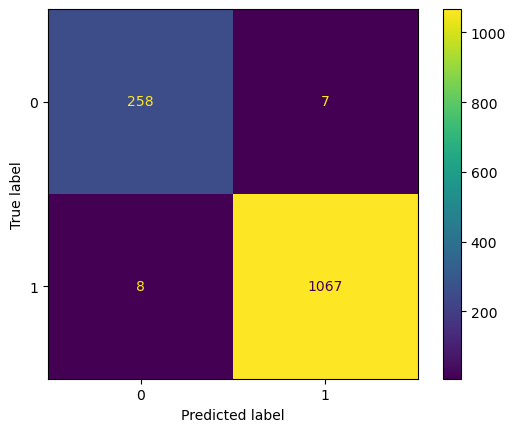

In [53]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [55]:
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       265
           1       0.99      0.99      0.99      1075

    accuracy                           0.99      1340
   macro avg       0.98      0.98      0.98      1340
weighted avg       0.99      0.99      0.99      1340

0.9888059701492538


#### Having 2 more layers helped the accuracy here

In [60]:
# Get cpu, gpu or mps device for training.
device = (
"cuda"
if torch.cuda.is_available()
else "mps"
if torch.backends.mps.is_available()
else "cpu"
)

#Create Model
class ANN_model5(nn.Module):
    def __init__(self,input_dim=241,hidden1_dim=120, hidden2_dim=60,hidden3_dim=30, hidden4_dim=15,hidden5_dim=7,out_dim=2):
        '''
        input_dim is 15 because there are 15 columns of features in this set.
        we are setting up 2 hidden layers the first has 20 nodes, the second has 10
        out_dim is 2 because there are two options - diabetic or non-diabetic
        '''
        super().__init__()
        #connent input to first hidden layer
        self.layer1 = nn.Linear(input_dim,hidden1_dim)
        #connect first hidden layer to the second hidden layer
        self.layer2 = nn.Linear(hidden1_dim,hidden2_dim)
        #connent input to first hidden layer
        self.layer3 = nn.Linear(hidden2_dim,hidden3_dim)
        #connect first hidden layer to the second hidden layer
        self.layer4 = nn.Linear(hidden3_dim,hidden4_dim)
        #connect first hidden layer to the second hidden layer
        self.layer5 = nn.Linear(hidden4_dim,hidden5_dim)
        #connect second hidden layer to output
        self.out = nn.Linear(hidden5_dim,out_dim)
        #Note: each layer has a weight and bias that in embedded in the linear layer

    def forward(self,x):
        #compute the output of f_connected1 and apply ReLu
        x = F.relu(self.layer1(x))
        #compute the output of f_connected2 and apply ReLu
        x = F.relu(self.layer2(x))
        #compute the output of f_connected1 and apply ReLu
        x = F.relu(self.layer3(x))
        #compute the output of f_connected2 and apply ReLu
        x = F.relu(self.layer4(x))
        #compute the output of f_connected2 and apply ReLu
        x = F.relu(self.layer5(x))
        #compute the output layer
        # no activation: cross entropy will compute softmax
        x = self.out(x)
        return x

In [61]:
#seed pytorch - for reproducibility of setting initial weights
torch.manual_seed(20)
#set up model using the class you made
model = ANN_model5().to(device)

In [62]:
#print out the model
print(model)

ANN_model5(
  (layer1): Linear(in_features=241, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=60, bias=True)
  (layer3): Linear(in_features=60, out_features=30, bias=True)
  (layer4): Linear(in_features=30, out_features=15, bias=True)
  (layer5): Linear(in_features=15, out_features=7, bias=True)
  (out): Linear(in_features=7, out_features=2, bias=True)
)


In [63]:
# Backward Propagation - loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [64]:
#set up number of epochs
epochs = 526
#create a list to for plotting - not required - but so you can see the change
final_losses= []
for i in range(epochs):
    #run forward pass
    y_pred=model.forward(X_train)
    #calculate the loss
    loss=loss_function(y_pred,y_train)
    #append for graphing
    final_losses.append(loss.item())
    #don't print all 500 - but some of them
    if i % 75 == 0:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    #Resets or zeros out the previous gradients
    optimizer.zero_grad()
    #computes gradient (dloss/dx) for every parameter x
    loss.backward()
    #update the weights using step
    optimizer.step()

Epoch number: 0 and the loss : 0.8902871012687683
Epoch number: 75 and the loss : 0.09814359247684479
Epoch number: 150 and the loss : 0.023756185546517372
Epoch number: 225 and the loss : 0.010681793093681335
Epoch number: 300 and the loss : 0.008120530284941196
Epoch number: 375 and the loss : 0.007738813292235136
Epoch number: 450 and the loss : 0.007557605858892202
Epoch number: 525 and the loss : 0.007490143645554781


In [65]:
#make a list of the results
predictions = []
#turn off gradient computation to speed up testing
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

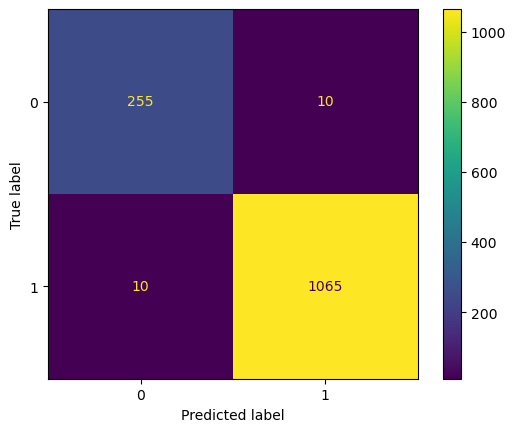

In [66]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [67]:
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       265
           1       0.99      0.99      0.99      1075

    accuracy                           0.99      1340
   macro avg       0.98      0.98      0.98      1340
weighted avg       0.99      0.99      0.99      1340

0.9850746268656716


#### Having one more layer didn't help

# Final Thoughts

<p>Having more layers helped in this case, and I figure that could be due to how many input dimensions my dataset has. That being said, this neural net didn't get as good of an accuracy for this dataset as the trees, which I also think is due to it's binary nature. Still allowed for a pretty good accuracy in terms of classifing things in the model with 4 layers. </p>

In [11]:
#set up number of epochs
epochs = 500
#create a list to for plotting - not required - but so you can see the change
final_losses= []
for i in range(epochs):
    #run forward pass
    y_pred=model.forward(X_train)
    #calculate the loss
    loss=loss_function(y_pred,y_train)
    #append for graphing
    final_losses.append(loss.item())
    #don't print all 500 - but some of them
    if i % 10 == 0:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    #Resets or zeros out the previous gradients
    optimizer.zero_grad()
    #computes gradient (dloss/dx) for every parameter x
    loss.backward()
    #update the weights using step
    optimizer.step()

Epoch number: 0 and the loss : 7.216541767120361
Epoch number: 10 and the loss : 0.882745623588562
Epoch number: 20 and the loss : 0.7243971824645996
Epoch number: 30 and the loss : 0.6850691437721252
Epoch number: 40 and the loss : 0.62884122133255
Epoch number: 50 and the loss : 0.6058641672134399
Epoch number: 60 and the loss : 0.596460223197937
Epoch number: 70 and the loss : 0.5879489779472351
Epoch number: 80 and the loss : 0.5836927890777588
Epoch number: 90 and the loss : 0.5778025388717651
Epoch number: 100 and the loss : 0.5717313289642334
Epoch number: 110 and the loss : 0.567734956741333
Epoch number: 120 and the loss : 0.5635650157928467
Epoch number: 130 and the loss : 0.5587884783744812
Epoch number: 140 and the loss : 0.5557228922843933
Epoch number: 150 and the loss : 0.5537784099578857
Epoch number: 160 and the loss : 0.550162136554718
Epoch number: 170 and the loss : 0.5459961295127869
Epoch number: 180 and the loss : 0.5387944579124451
Epoch number: 190 and the loss